In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
native=pd.read_csv('native.csv')
foreigner=pd.read_csv('foreigner.csv')
# trip=pd.read_csv('trip.csv')
# culture_performance=pd.read_csv('culture_performance.csv')
# w=pd.read_csv('w.csv')
# ww=pd.read_csv('ww.csv')

In [4]:
native

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
0,울산,울산,남구,여행,숙박,M,20,201701,RED,활동,29642635.0,895
1,충북,대전,동구,여행,교통,F,20,201701,WHITE,휴식,123274128.0,10231
2,경북,대전,동구,여행,교통,M,30,201701,RED,휴식,95719488.0,7363
3,경북,대전,동구,여행,교통,F,30,201701,WHITE,휴식,188659152.0,12908
4,광주,대전,동구,여행,교통,F,20,201701,WHITE,활동,201232160.0,5600
...,...,...,...,...,...,...,...,...,...,...,...,...
8563344,울산,경기,의정부시,문화예술활동,공연관람,M,20,202006,RED,활동,293314.0,20
8563345,부산,부산,해운대구,여행,관광쇼핑,M,50,202006,WHITE,활동,6529655.0,25
8563346,충남,부산,해운대구,문화예술활동,공연관람,M,20,202006,RED,활동,224840.0,10
8563347,경남,부산,해운대구,문화예술활동,공연관람,M,20,202006,RED,휴식,762412.0,30


In [157]:
date=pd.date_range(start='20040101', end='20200501', freq='MS')
ww['date']=date
year=ww['date'].dt.year.astype(str)
month=ww['date'].dt.month.astype(str)
date=year+'-'+month
date

0      2004-1
1      2004-2
2      2004-3
3      2004-4
4      2004-5
        ...  
192    2020-1
193    2020-2
194    2020-3
195    2020-4
196    2020-5
Name: date, Length: 197, dtype: object

In [158]:
date2=pd.date_range(start='20140101', end='20200701', freq='MS')
culture_performance['date']=date2
year2=culture_performance['date'].dt.year.astype(str)
month2=culture_performance['date'].dt.month.astype(str)
date2=year2+'-'+month2
date2

0     2014-1
1     2014-2
2     2014-3
3     2014-4
4     2014-5
       ...  
74    2020-3
75    2020-4
76    2020-5
77    2020-6
78    2020-7
Name: date, Length: 79, dtype: object

In [159]:
trip['date']=date
w['date']=date
ww['date']=date
culture_performance['date']=date2

In [160]:
display(native,foreigner,trip,culture_performance,w,ww)

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
0,울산,울산,남구,여행,숙박,M,20,201701,RED,활동,29642635.0,895
1,충북,대전,동구,여행,교통,F,20,201701,WHITE,휴식,123274128.0,10231
2,경북,대전,동구,여행,교통,M,30,201701,RED,휴식,95719488.0,7363
3,경북,대전,동구,여행,교통,F,30,201701,WHITE,휴식,188659152.0,12908
4,광주,대전,동구,여행,교통,F,20,201701,WHITE,활동,201232160.0,5600
...,...,...,...,...,...,...,...,...,...,...,...,...
8563344,울산,경기,의정부시,문화예술활동,공연관람,M,20,202006,RED,활동,293314.0,20
8563345,부산,부산,해운대구,여행,관광쇼핑,M,50,202006,WHITE,활동,6529655.0,25
8563346,충남,부산,해운대구,문화예술활동,공연관람,M,20,202006,RED,활동,224840.0,10
8563347,경남,부산,해운대구,문화예술활동,공연관람,M,20,202006,RED,휴식,762412.0,30


,NT,V2,V3,GB3,GB2,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC
0,태국,서울,용산구,쇼핑,기타지출,201703,WHITE,기타,3917910,55
1,일본,서울,용산구,쇼핑,기타지출,201805,WHITE,기타,11586560,261
2,영국,서울,용산구,쇼핑,기타지출,201807,WHITE,기타,3483630,120
3,베트남,경기,오산시,쇼핑,기타지출,201705,WHITE,기타,12000,9
4,미국,서울,용산구,쇼핑,기타지출,201802,RED,기타,20831646,449
...,...,...,...,...,...,...,...,...,...,...
2274187,베트남,서울,용산구,음식,유흥,202006,WHITE,기타,250000,1
2274188,오스트레일리아,부산,사상구,쇼핑,기타쇼핑,202006,RED,기타,15000,1
2274189,미국,대전,동구,음식,유흥,202005,RED,기타,160000,1
2274190,중국,부산,부산진구,음식,유흥,202006,WHITE,기타,202171,2


,date,for_inpop,g_for_inpop,kor_outpop,g_kor_outpop,income,g_income,expense,g_expense
0,2004-1,"423,726",-10.1,"793,334",-6.9,399,-4.5,732,-10.1
1,2004-2,"403,812",-1.2,"670,448",-7.9,439,-5.2,682,-12.0
2,2004-3,"448,940",-10.9,"587,629",-13.1,512,-10.4,691,-13.5
3,2004-4,"452,725",-42.7,"642,413",-89.3,471,-11.6,710,-53.2
4,2004-5,"475,937",-79.5,"680,185",-88.8,535,-45.9,665,-21.9
...,...,...,...,...,...,...,...,...,...
192,2020-1,"1,272,708",15.2,"2,513,030",-13.7,"1,579.70",2.0,"2,507.30",-6.7
193,2020-2,"685,212",-43.0,"1,046,779",-60.0,"1,147.50",-26.2,"1,418.20",-35.7
194,2020-3,"83,497",-94.6,"143,366",-93.9,729.8,-67.2,881.5,-59.9
195,2020-4,"29,415",-98.2,"31,425",-98.6,351.8,-83.2,577.5,-75.0


,date,num_performance,g_num_performance,num_peropen,g_num_peropen,num_perscreen,g_num_perscreen,revenue,g_revenue,soldticket,g_soldticket
0,2014-1,90,5.20%,85,5.30%,416,8.60%,"1,464,333",4.80%,"119,339",6.80%
1,2014-2,119,6.90%,116,7.20%,344,7.10%,"1,869,354",6.10%,"117,243",6.70%
2,2014-3,147,8.60%,143,8.90%,398,8.20%,"3,644,023",11.90%,"168,543",9.60%
3,2014-4,169,9.80%,162,10.10%,403,8.30%,"2,444,243",8.00%,"174,613",9.90%
4,2014-5,179,10.40%,173,10.80%,411,8.50%,"3,160,320",10.30%,"182,179",10.30%
...,...,...,...,...,...,...,...,...,...,...,...
74,2020-3,187,6.40%,70,3.60%,"2,206",7.90%,"9,122,645",8.40%,"161,893",6.40%
75,2020-4,176,6.00%,94,4.90%,"2,167",7.80%,"4,677,635",4.30%,"116,410",4.60%
76,2020-5,342,11.70%,232,12.10%,"3,727",13.40%,"11,248,992",10.40%,"245,833",9.80%
77,2020-6,454,15.60%,317,16.50%,"3,536",12.70%,"10,417,633",9.60%,"238,208",9.50%


,date,w_departstore,w_largemarget,w_constore,w_dutyfreeshop,w_fnb,w_clothesfiber,w_shoeleather,w_cosmetic,w_train,...,w_kfood,w_nkfood,w_cafeteria,w_pub,w_npub,w_artcreate,w_lib_historicsite,w_amusement,w_hairshop,w_spa
0,2004-1,63.7,NaN,21.3,NaN,69.5,87.1,62.0,86.6,38.7,...,NaN,NaN,NaN,109.4,NaN,57.7,55.8,69.6,79.5,155.6
1,2004-2,54.5,NaN,19.9,NaN,60.0,80.7,66.1,83.3,38.1,...,NaN,NaN,NaN,103.5,NaN,60.5,49.8,50.4,75.8,135.1
2,2004-3,58.5,NaN,21.8,NaN,63.9,85.1,81.7,87.1,42.0,...,NaN,NaN,NaN,104.6,NaN,72.0,56.1,43.8,74.6,128.4
3,2004-4,61.7,NaN,21.7,NaN,63.0,89.0,85.5,86.1,53.2,...,NaN,NaN,NaN,107.3,NaN,69.7,63.0,79.9,76.6,117.2
4,2004-5,60.7,NaN,23.3,NaN,63.9,94.9,88.2,87.9,52.1,...,NaN,NaN,NaN,108.3,NaN,71.9,58.6,85.7,75.7,116.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2020-1,105.2,118.5,150.3,264.1,115.5,85.1,103.1,106.6,129.6,...,100.8,95.5,105.8,98.4,164.8,93.8,99.5,92.6,92.6,169.1
193,2020-2,74.5,90.3,141.3,143.8,90.5,59.9,80.6,58.7,77.8,...,74.6,78.8,90.7,80.2,137.4,68.0,81.7,41.4,75.5,92.6
194,2020-3,70.1,95.2,147.0,141.9,75.4,56.6,76.0,45.5,46.0,...,61.5,67.5,91.4,68.6,133.9,65.7,90.3,32.2,67.6,67.8
195,2020-4,84.9,95.0,148.5,128.7,78.9,73.4,90.0,61.8,60.9,...,75.8,80.9,88.4,72.8,150.3,62.0,86.5,33.2,79.3,72.7


,date,w/departstore,w/largemarget,w/constore,w/dutyfreeshop,w/fnb,w/clothesfiber,w/shoeleather,w/cosmetic,w/train,...,w/kfood,w/nkfood,w/cafeteria,w/pub,w/npub,w/artcreate,w/lib_historicsite,w/amusement,w/hairshop,w/spa
0,2004-1,86.4,NaN,38.5,NaN,104.7,123.2,80.9,115.0,46.3,...,NaN,NaN,NaN,130.7,NaN,66.0,72.9,87.1,112.6,221.9
1,2004-2,74.0,NaN,35.6,NaN,89.4,114.1,85.2,110.7,45.7,...,NaN,NaN,NaN,123.6,NaN,69.5,64.2,63.1,107.3,192.6
2,2004-3,79.4,NaN,38.6,NaN,93.5,119.4,104.5,116.4,50.4,...,NaN,NaN,NaN,124.5,NaN,82.3,72.1,54.6,105.0,181.4
3,2004-4,83.8,NaN,38.5,NaN,92.3,124.7,110.7,116.9,63.6,...,NaN,NaN,NaN,127.6,NaN,79.6,80.9,99.4,108.5,166.4
4,2004-5,82.7,NaN,41.4,NaN,94.2,133.6,111.9,119.0,62.2,...,NaN,NaN,NaN,128.9,NaN,81.9,75.2,106.7,107.3,165.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2020-1,101.0,110.7,142.8,267.7,104.9,81.4,97.8,111.2,132.6,...,89.8,85.6,92.9,86.6,158.1,87.7,91.9,83.0,83.8,149.1
193,2020-2,71.7,84.5,134.9,146.6,82.5,57.3,75.2,60.8,79.4,...,66.4,70.7,79.6,70.6,131.8,63.6,75.4,37.1,68.3,81.5
194,2020-3,67.7,88.7,140.2,146.0,68.2,54.0,71.0,47.1,46.5,...,54.7,60.5,80.1,60.4,128.4,61.4,83.2,28.9,61.1,59.7
195,2020-4,82.3,88.6,141.7,133.6,71.3,70.5,87.1,64.7,61.9,...,67.4,72.5,77.3,64.0,144.2,58.0,79.7,29.7,71.7,64.1


# native 이상치

In [167]:
native.describe()

,cln_age_r,ta_ym,vlm,usec
count,8.563349e+06,8.563349e+06,8.563349e+06,8.563349e+06
mean,3.721073e+01,2.018302e+05,6.997115e+06,1.506195e+02
std,1.334021e+01,9.942178e+01,9.839235e+07,1.409545e+03
min,2.000000e+01,2.017010e+05,0.000000e+00,4.000000e+00
25%,3.000000e+01,2.017110e+05,1.467000e+05,5.000000e+00
50%,4.000000e+01,2.018090e+05,4.202400e+05,1.000000e+01
75%,5.000000e+01,2.019070e+05,1.682450e+06,3.500000e+01
max,6.000000e+01,2.020060e+05,1.821475e+11,1.630860e+05


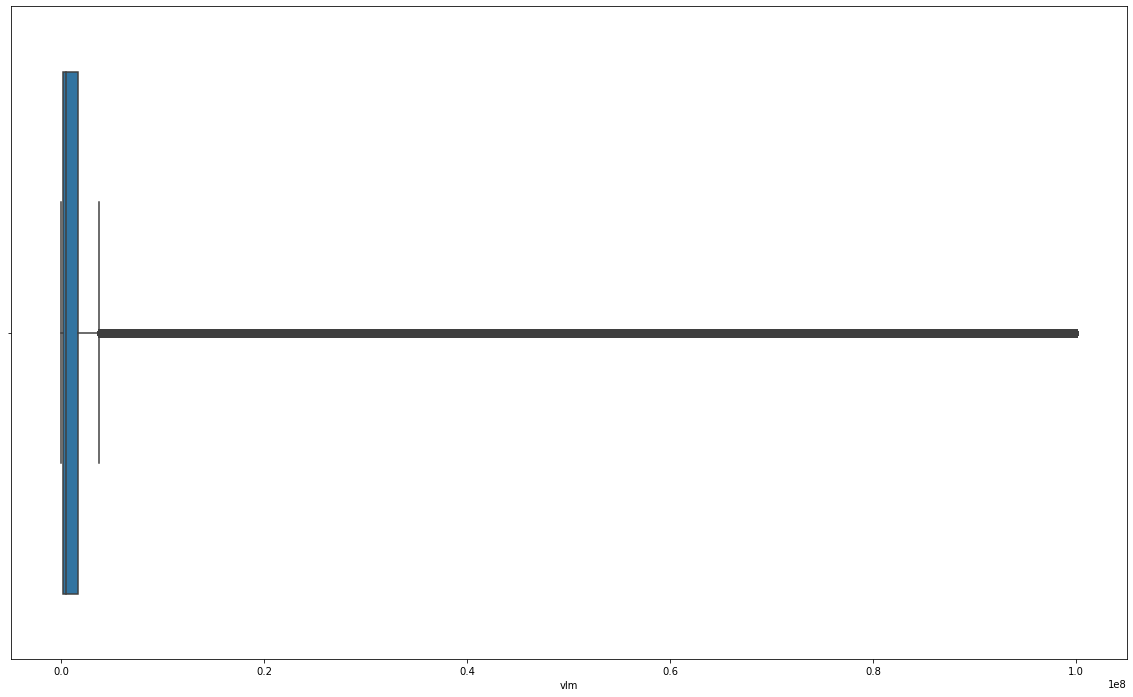

In [178]:
plt.figure(figsize=(20,12))
sns.boxplot(native['vlm'][native['vlm']<100000000])

In [191]:
native=native[native['vlm']<100000000]
native

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
0,울산,울산,남구,여행,숙박,M,20,201701,RED,활동,29642635.0,895
2,경북,대전,동구,여행,교통,M,30,201701,RED,휴식,95719488.0,7363
5,인천,대전,동구,여행,교통,M,50,201701,RED,휴식,39237696.0,1976
8,경남,대전,동구,여행,교통,M,50,201701,RED,휴식,56903104.0,2491
9,대전,대전,동구,여행,숙박,M,60,201701,RED,취침,788800.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...
8563344,울산,경기,의정부시,문화예술활동,공연관람,M,20,202006,RED,활동,293314.0,20
8563345,부산,부산,해운대구,여행,관광쇼핑,M,50,202006,WHITE,활동,6529655.0,25
8563346,충남,부산,해운대구,문화예술활동,공연관람,M,20,202006,RED,활동,224840.0,10
8563347,경남,부산,해운대구,문화예술활동,공연관람,M,20,202006,RED,휴식,762412.0,30


# foreigner 이상치

In [213]:
foreigner

,NT,V2,V3,GB3,GB2,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC
0,태국,서울,용산구,쇼핑,기타지출,201703,WHITE,기타,3917910,55
1,일본,서울,용산구,쇼핑,기타지출,201805,WHITE,기타,11586560,261
2,영국,서울,용산구,쇼핑,기타지출,201807,WHITE,기타,3483630,120
3,베트남,경기,오산시,쇼핑,기타지출,201705,WHITE,기타,12000,9
4,미국,서울,용산구,쇼핑,기타지출,201802,RED,기타,20831646,449
...,...,...,...,...,...,...,...,...,...,...
2274187,베트남,서울,용산구,음식,유흥,202006,WHITE,기타,250000,1
2274188,오스트레일리아,부산,사상구,쇼핑,기타쇼핑,202006,RED,기타,15000,1
2274189,미국,대전,동구,음식,유흥,202005,RED,기타,160000,1
2274190,중국,부산,부산진구,음식,유흥,202006,WHITE,기타,202171,2


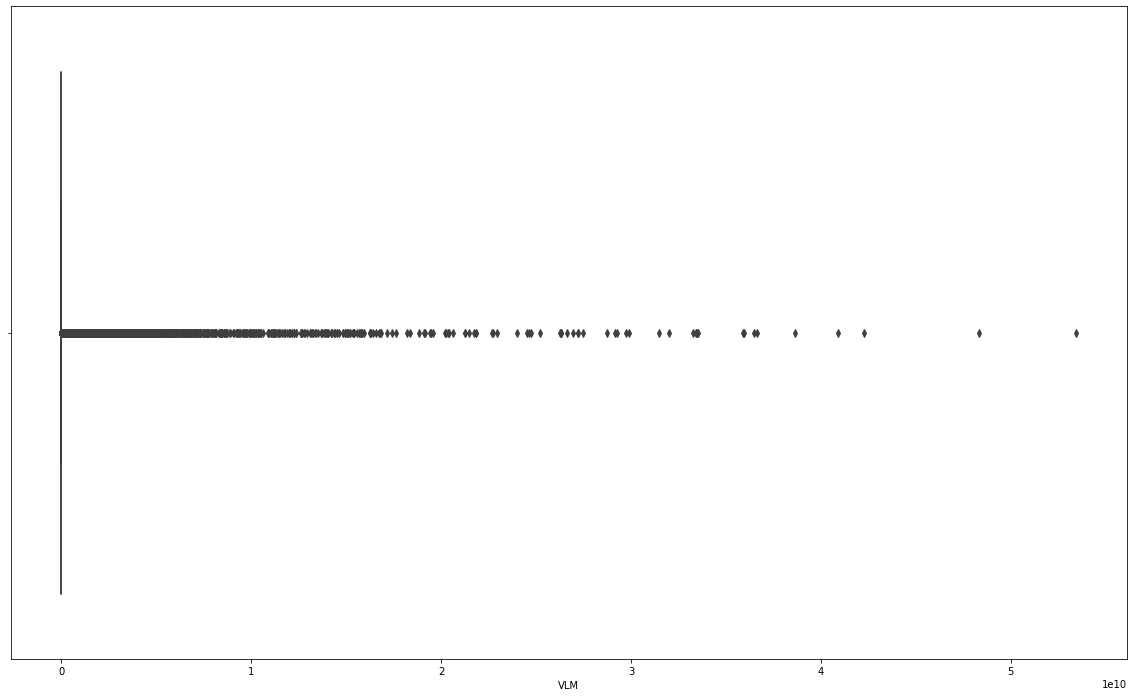

In [210]:
plt.figure(figsize=(20,12))
sns.boxplot(foreigner['VLM'])